In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.shape

(5000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [7]:
df.test_result.value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [8]:
df.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

# EDA

In [9]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<AxesSubplot:xlabel='age'>

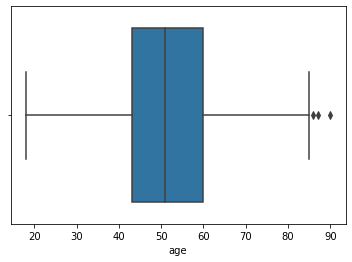

In [10]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='physical_score'>

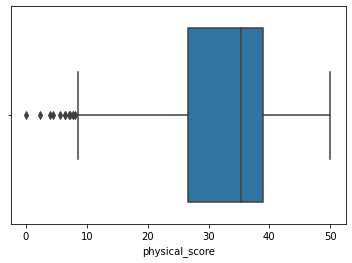

In [11]:
sns.boxplot(df.physical_score)

<AxesSubplot:xlabel='test_result', ylabel='count'>

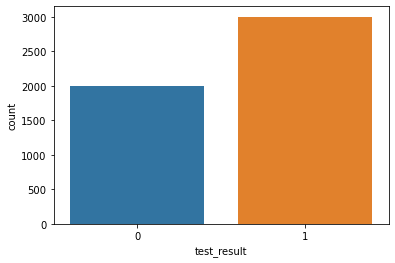

In [12]:
sns.countplot(df.test_result)

<AxesSubplot:xlabel='test_result', ylabel='age'>

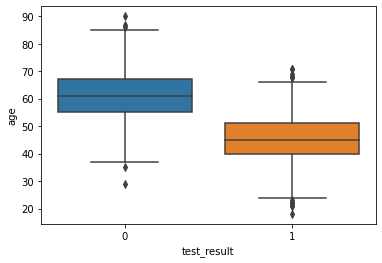

In [13]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

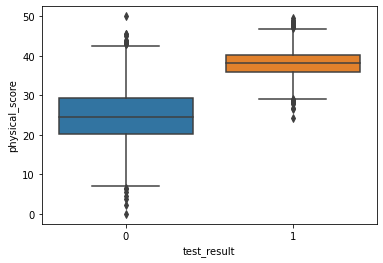

In [14]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

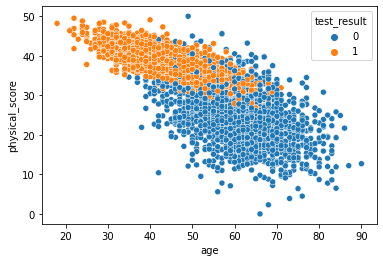

In [15]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

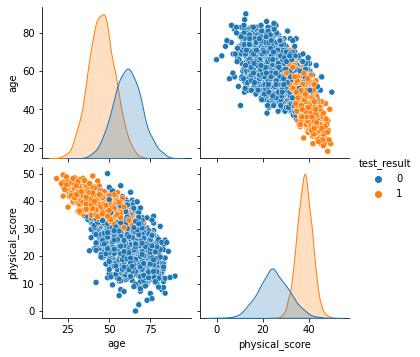

In [16]:
sns.pairplot(df,hue='test_result')

In [17]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<AxesSubplot:>

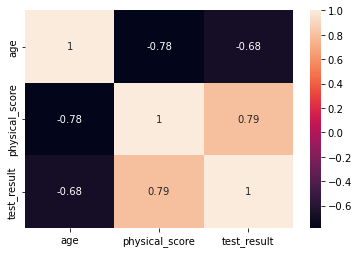

In [18]:
sns.heatmap(df.corr(),annot=True)

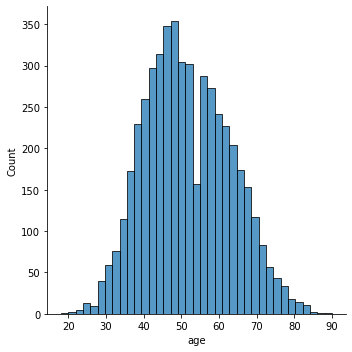

In [19]:
sns.displot(df.age)

In [20]:
df.age.skew()

0.22094186437338537

In [21]:
df.physical_score.skew()

-0.7792816279520084

In [22]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [23]:
X = df.drop('test_result',axis=1)
y=df['test_result']

# EDA

In [24]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['age'],tail='both',fold=1.5)

df['age']=win.fit_transform(df[['age']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'age': 17.5} {'age': 85.5}


In [25]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['physical_score'],tail='both',fold=1.5)

df['physical_score']=win.fit_transform(df[['physical_score']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'physical_score': 8.399999999999999} {'physical_score': 57.20000000000001}


# train_test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=500,test_size=0.3)

# Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# modeling

## logistic regression model(base line model)

In [29]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [30]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [31]:
log_model.intercept_

array([0.54647338])

In [32]:
log_model.coef_

array([[-0.88669972,  3.39700416]])

# prediction

In [33]:
train_prediction = log_model.predict(X_train)

test_prediction = log_model.predict(X_test)

# evaluation

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_train,train_prediction)

0.9105714285714286

In [36]:
accuracy_score(y_test,test_prediction)

0.93

# cross validation score

In [37]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(log_model,X,y,cv=5)

print(score)
score.mean()

[0.933 0.915 0.908 0.91  0.914]


0.916

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,test_prediction)

array([[537,  73],
       [ 32, 858]], dtype=int64)

In [40]:
from sklearn.metrics import plot_confusion_matrix

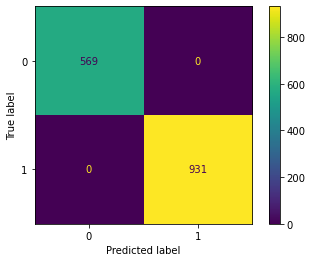

In [41]:
plot_confusion_matrix(log_model,X_test,test_prediction)

# classification report

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       610
           1       0.92      0.96      0.94       890

    accuracy                           0.93      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500



# AUC ( area under curve)

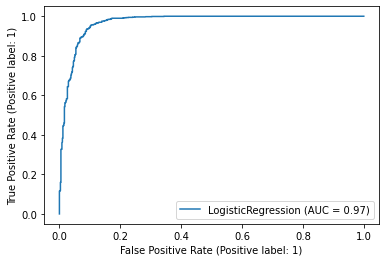

In [43]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_model,X_test,y_test)

# KNN-- K-Nearest neighbors algorithms 

In [44]:
df1=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\hearing_test.csv')
df1.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [45]:
X = df1.drop('test_result',axis=1)
y=df1['test_result']

# train test split

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=500,test_size=0.3)

# scaling

In [47]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# modeling-  base model with default parameter

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# model
knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))

# cross validation score
print('*'*20)

from sklearn.model_selection import cross_val_score
score= cross_val_score(knn_model,X,y,cv=5)
print(score)
score.mean()

0.9166666666666666
0.9394285714285714
[0.923 0.918 0.912 0.92  0.919]


0.9184000000000001

In [50]:
test_acc = []
for k in range(1,50):
    knn_model=KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train,y_train)
    train_prediction= knn_model.predict(X_train)
    test_prediction= knn_model.predict(X_test)
    test_accuracy=accuracy_score(y_test,test_prediction)
    test_acc.append(test_accuracy)

test_acc

[0.89,
 0.8773333333333333,
 0.9153333333333333,
 0.9146666666666666,
 0.9166666666666666,
 0.9186666666666666,
 0.9226666666666666,
 0.9246666666666666,
 0.93,
 0.9266666666666666,
 0.9286666666666666,
 0.928,
 0.932,
 0.9313333333333333,
 0.932,
 0.9333333333333333,
 0.936,
 0.9366666666666666,
 0.9366666666666666,
 0.936,
 0.934,
 0.936,
 0.9333333333333333,
 0.934,
 0.9326666666666666,
 0.9346666666666666,
 0.934,
 0.9353333333333333,
 0.9346666666666666,
 0.9346666666666666,
 0.936,
 0.934,
 0.9366666666666666,
 0.9353333333333333,
 0.9373333333333334,
 0.938,
 0.9366666666666666,
 0.938,
 0.9346666666666666,
 0.936,
 0.934,
 0.9373333333333334,
 0.9366666666666666,
 0.938,
 0.9353333333333333,
 0.9353333333333333,
 0.9366666666666666,
 0.9373333333333334,
 0.9373333333333334]

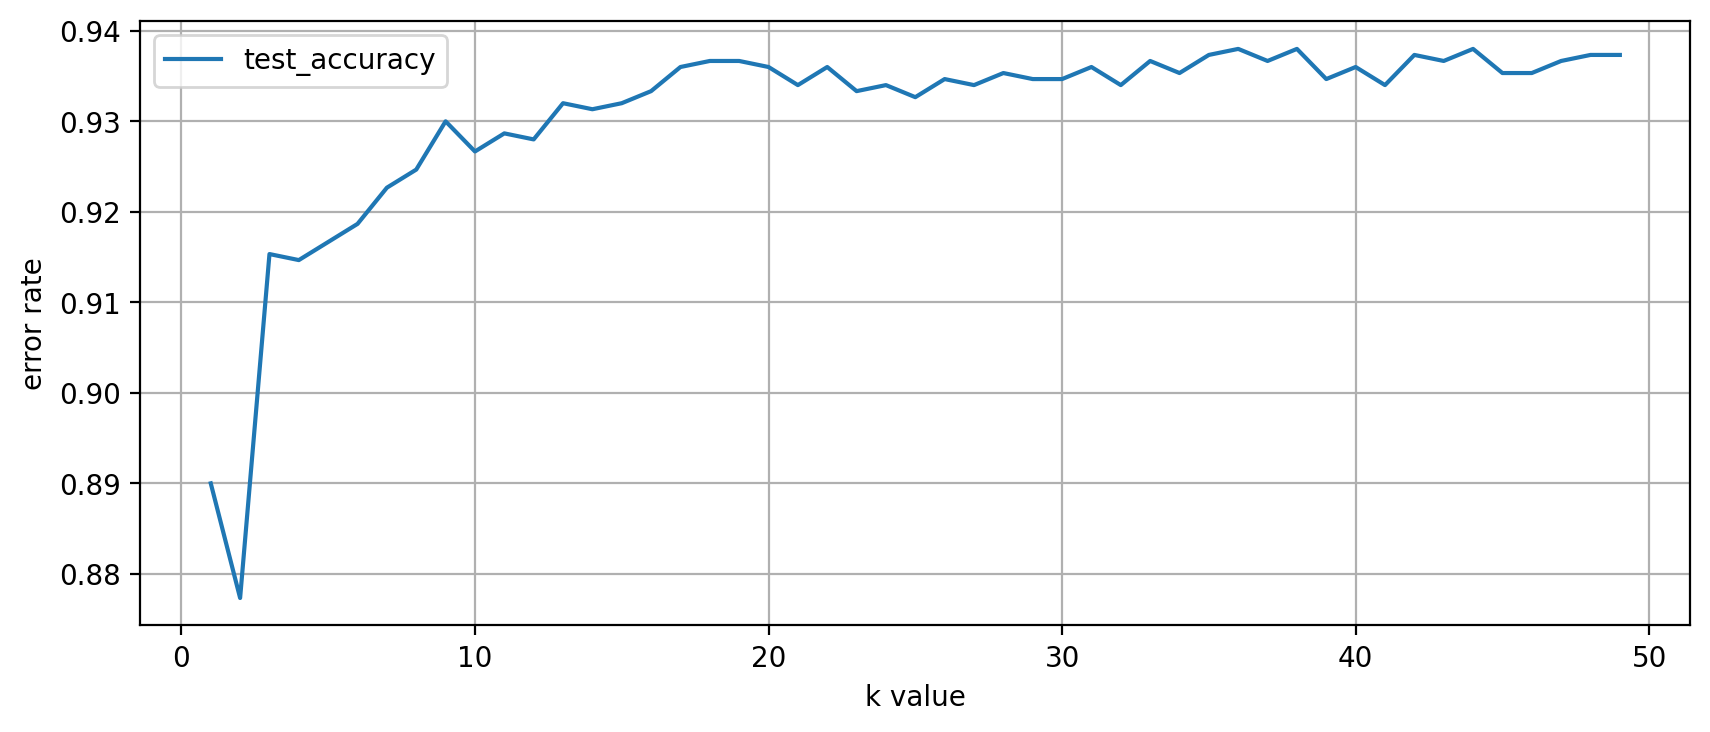

In [51]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,50),test_acc,label='test_accuracy')
plt.grid()
plt.ylabel('error rate')
plt.xlabel('k value')
plt.legend()

# modeling- hyperparameter tuning for KNN classifier

In [52]:
from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()
param_grid= {'n_neighbors' : list(range(1,50)),'p':[1,2]}

Hp_knn= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_knn.fit(X_train,y_train)

Hp_knn.best_params_

{'n_neighbors': 8, 'p': 2}

# rebuilt KNN model with best hyperparameter tunning

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=8,p=2)

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))


score= cross_val_score(knn_model,X,y,cv=5)
print(score)
score.mean()


0.9246666666666666
0.9337142857142857
[0.928 0.914 0.914 0.92  0.917]


0.9186

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[540,  70],
       [ 43, 847]], dtype=int64)

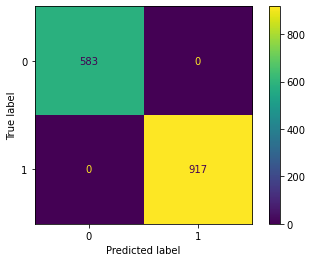

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,test_prediction)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       610
           1       0.92      0.95      0.94       890

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



# Decision tree Classifier

In [57]:
df2=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\hearing_test.csv')
df2.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [58]:
X = df2.drop('test_result',axis=1)
y=df2['test_result']

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=500,test_size=0.3)

# modeling with default parameter

In [60]:
from sklearn.tree import DecisionTreeClassifier
# modeling

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
# prediction
train_pred=dtc.predict(X_train)
test_pred= dtc.predict(X_test)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))
 # cross validation  
score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

Train accuracy: 0.9751428571428571
Test accuracy: 0.8793333333333333
[0.881 0.879 0.891 0.882 0.88 ]


0.8826

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[530,  80],
       [101, 789]], dtype=int64)

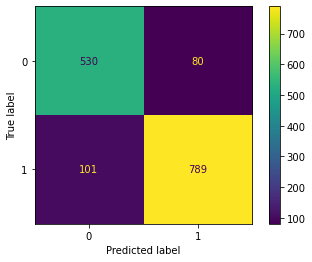

In [62]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc,X_test,test_pred)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       610
           1       0.91      0.89      0.90       890

    accuracy                           0.88      1500
   macro avg       0.87      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



In [64]:
dtc.feature_importances_

array([0.14073751, 0.85926249])

In [65]:
pd.DataFrame(index=X.columns,data=dtc.feature_importances_,columns=['feature importance'])

,feature importance
age,0.140738
physical_score,0.859262


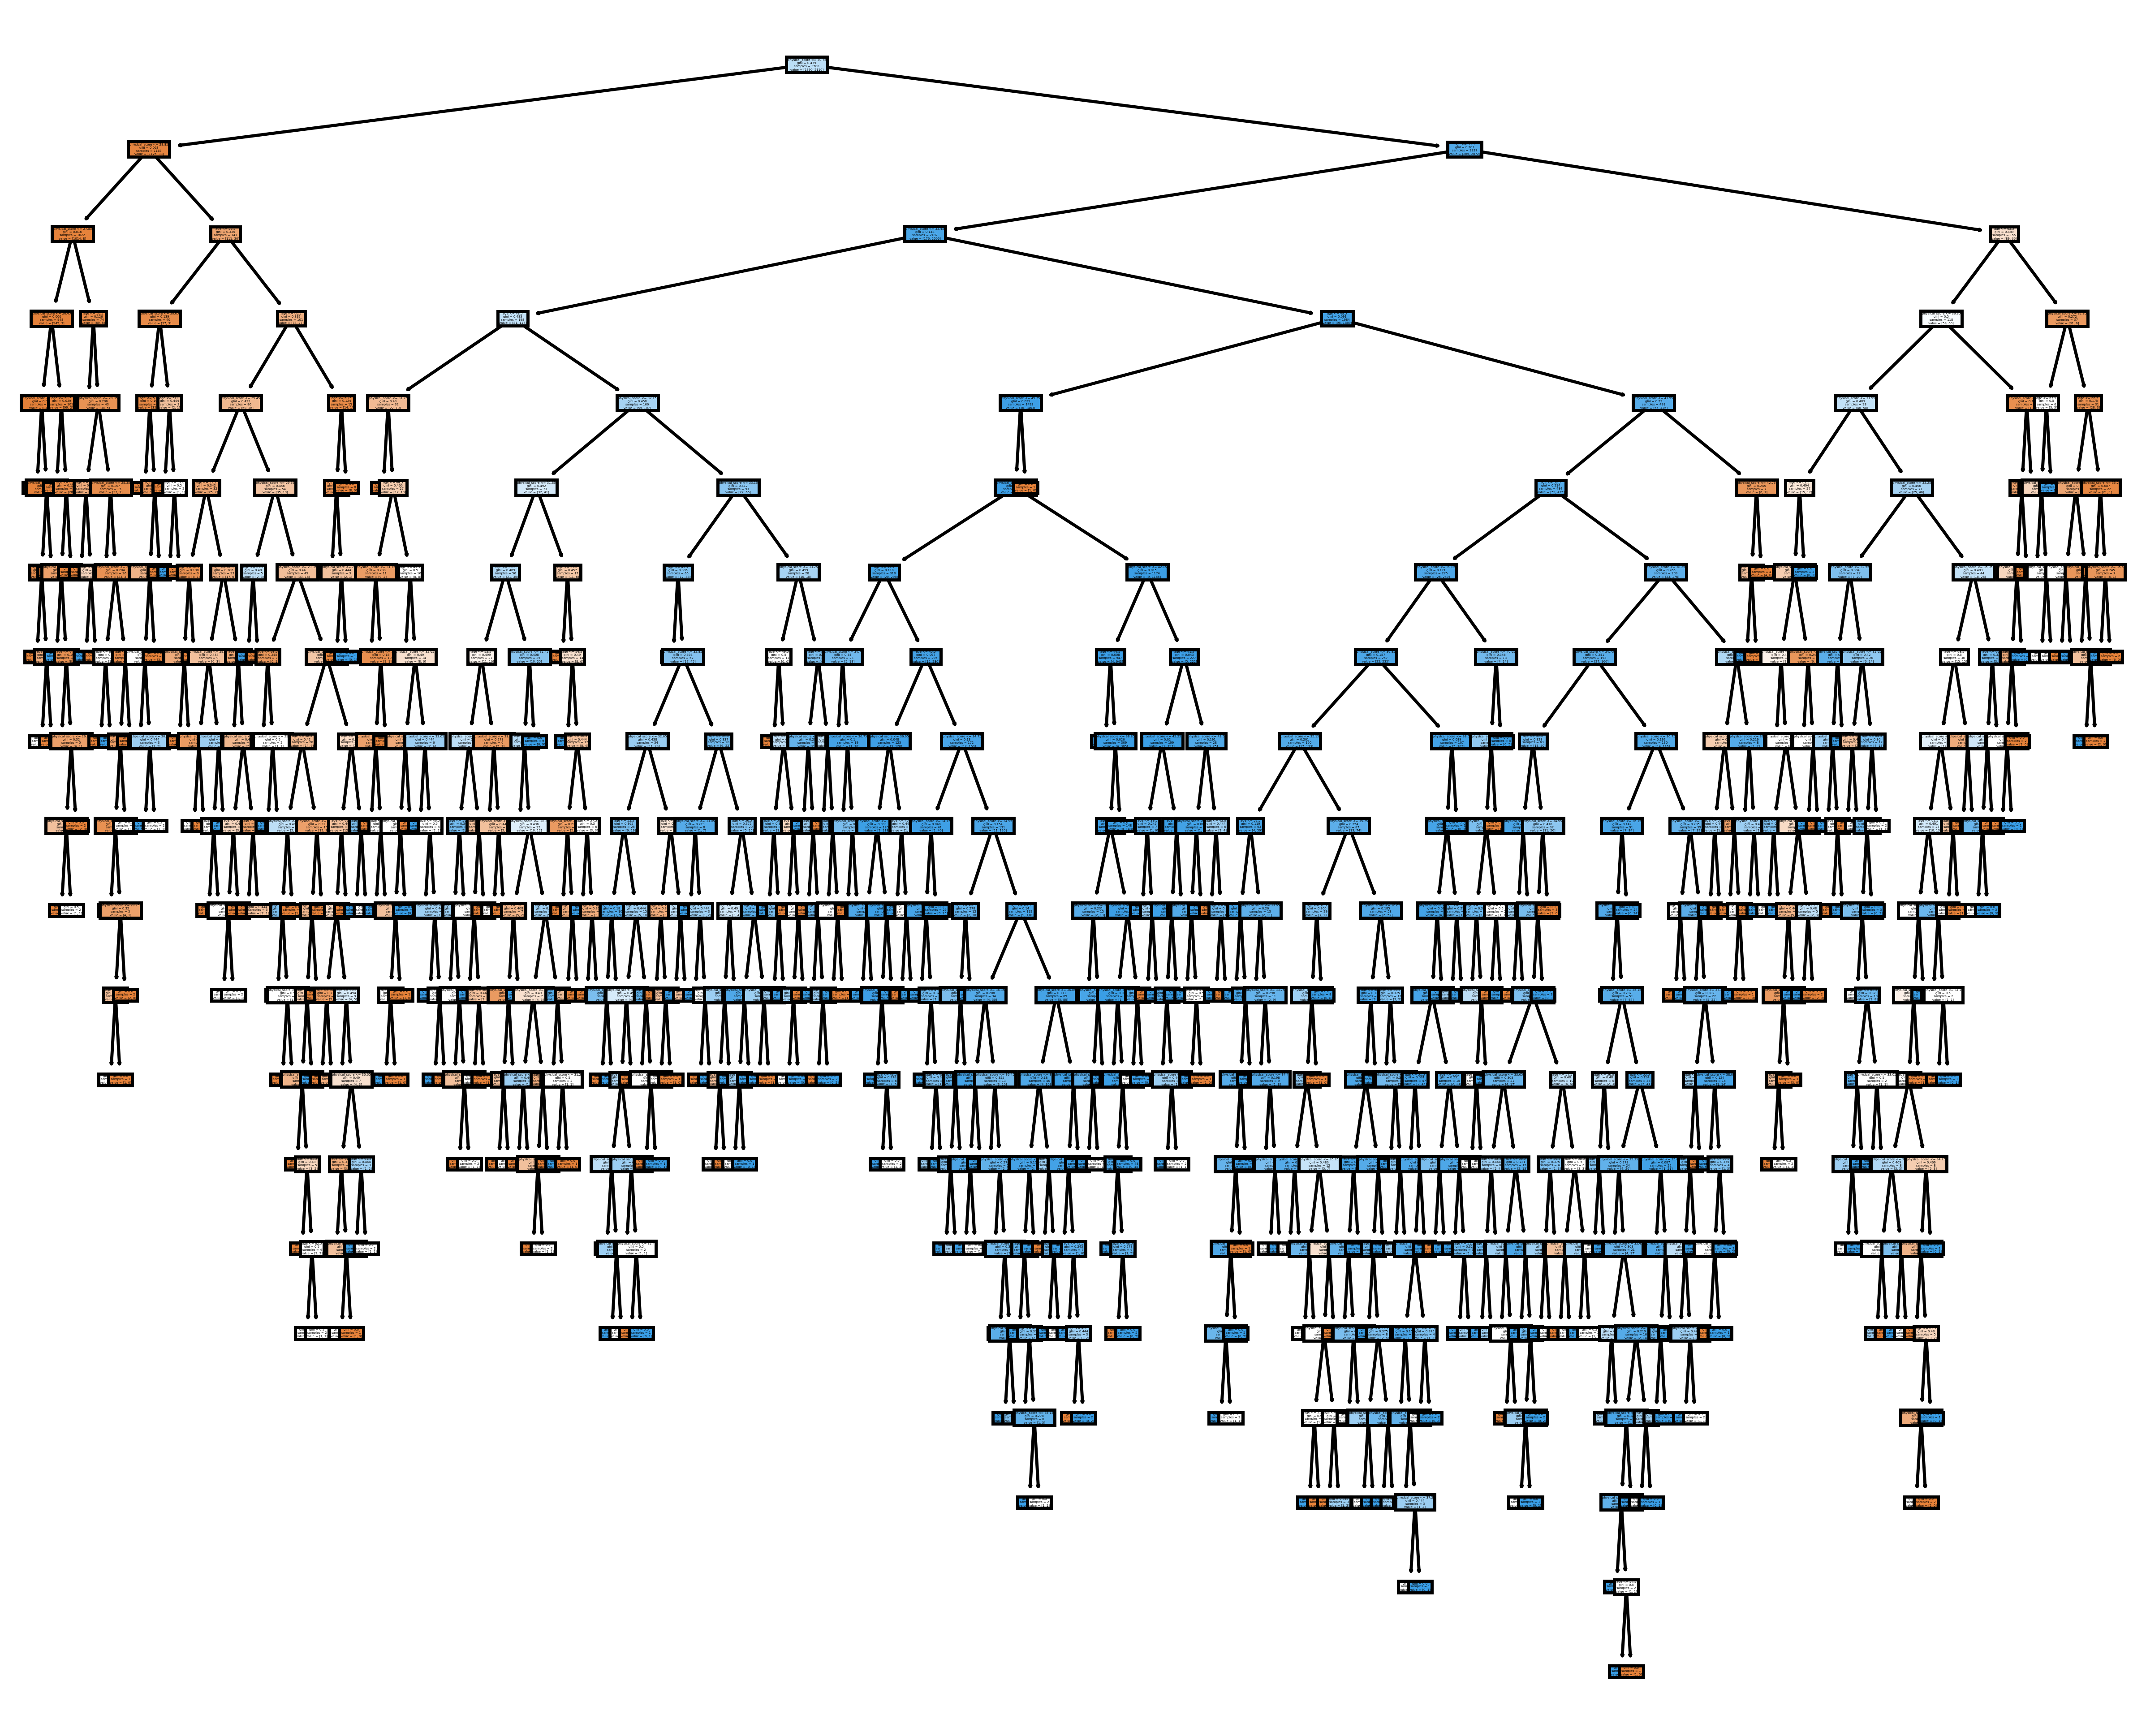

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10),dpi=500)
plot_tree(dtc,filled=True,feature_names= X.columns)
plt.show()

# hyper parameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=42)
param_grid= {'max_leaf_nodes' : list(range(1,40)),'criterion':['gini','entropy']}

Hp_dtc= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_dtc.fit(X_train,y_train)

Hp_dtc.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 27}

Train accuracy: 0.9365714285714286
Test accuracy: 0.9286666666666666
[0.932 0.912 0.918 0.922 0.917]


0.9202

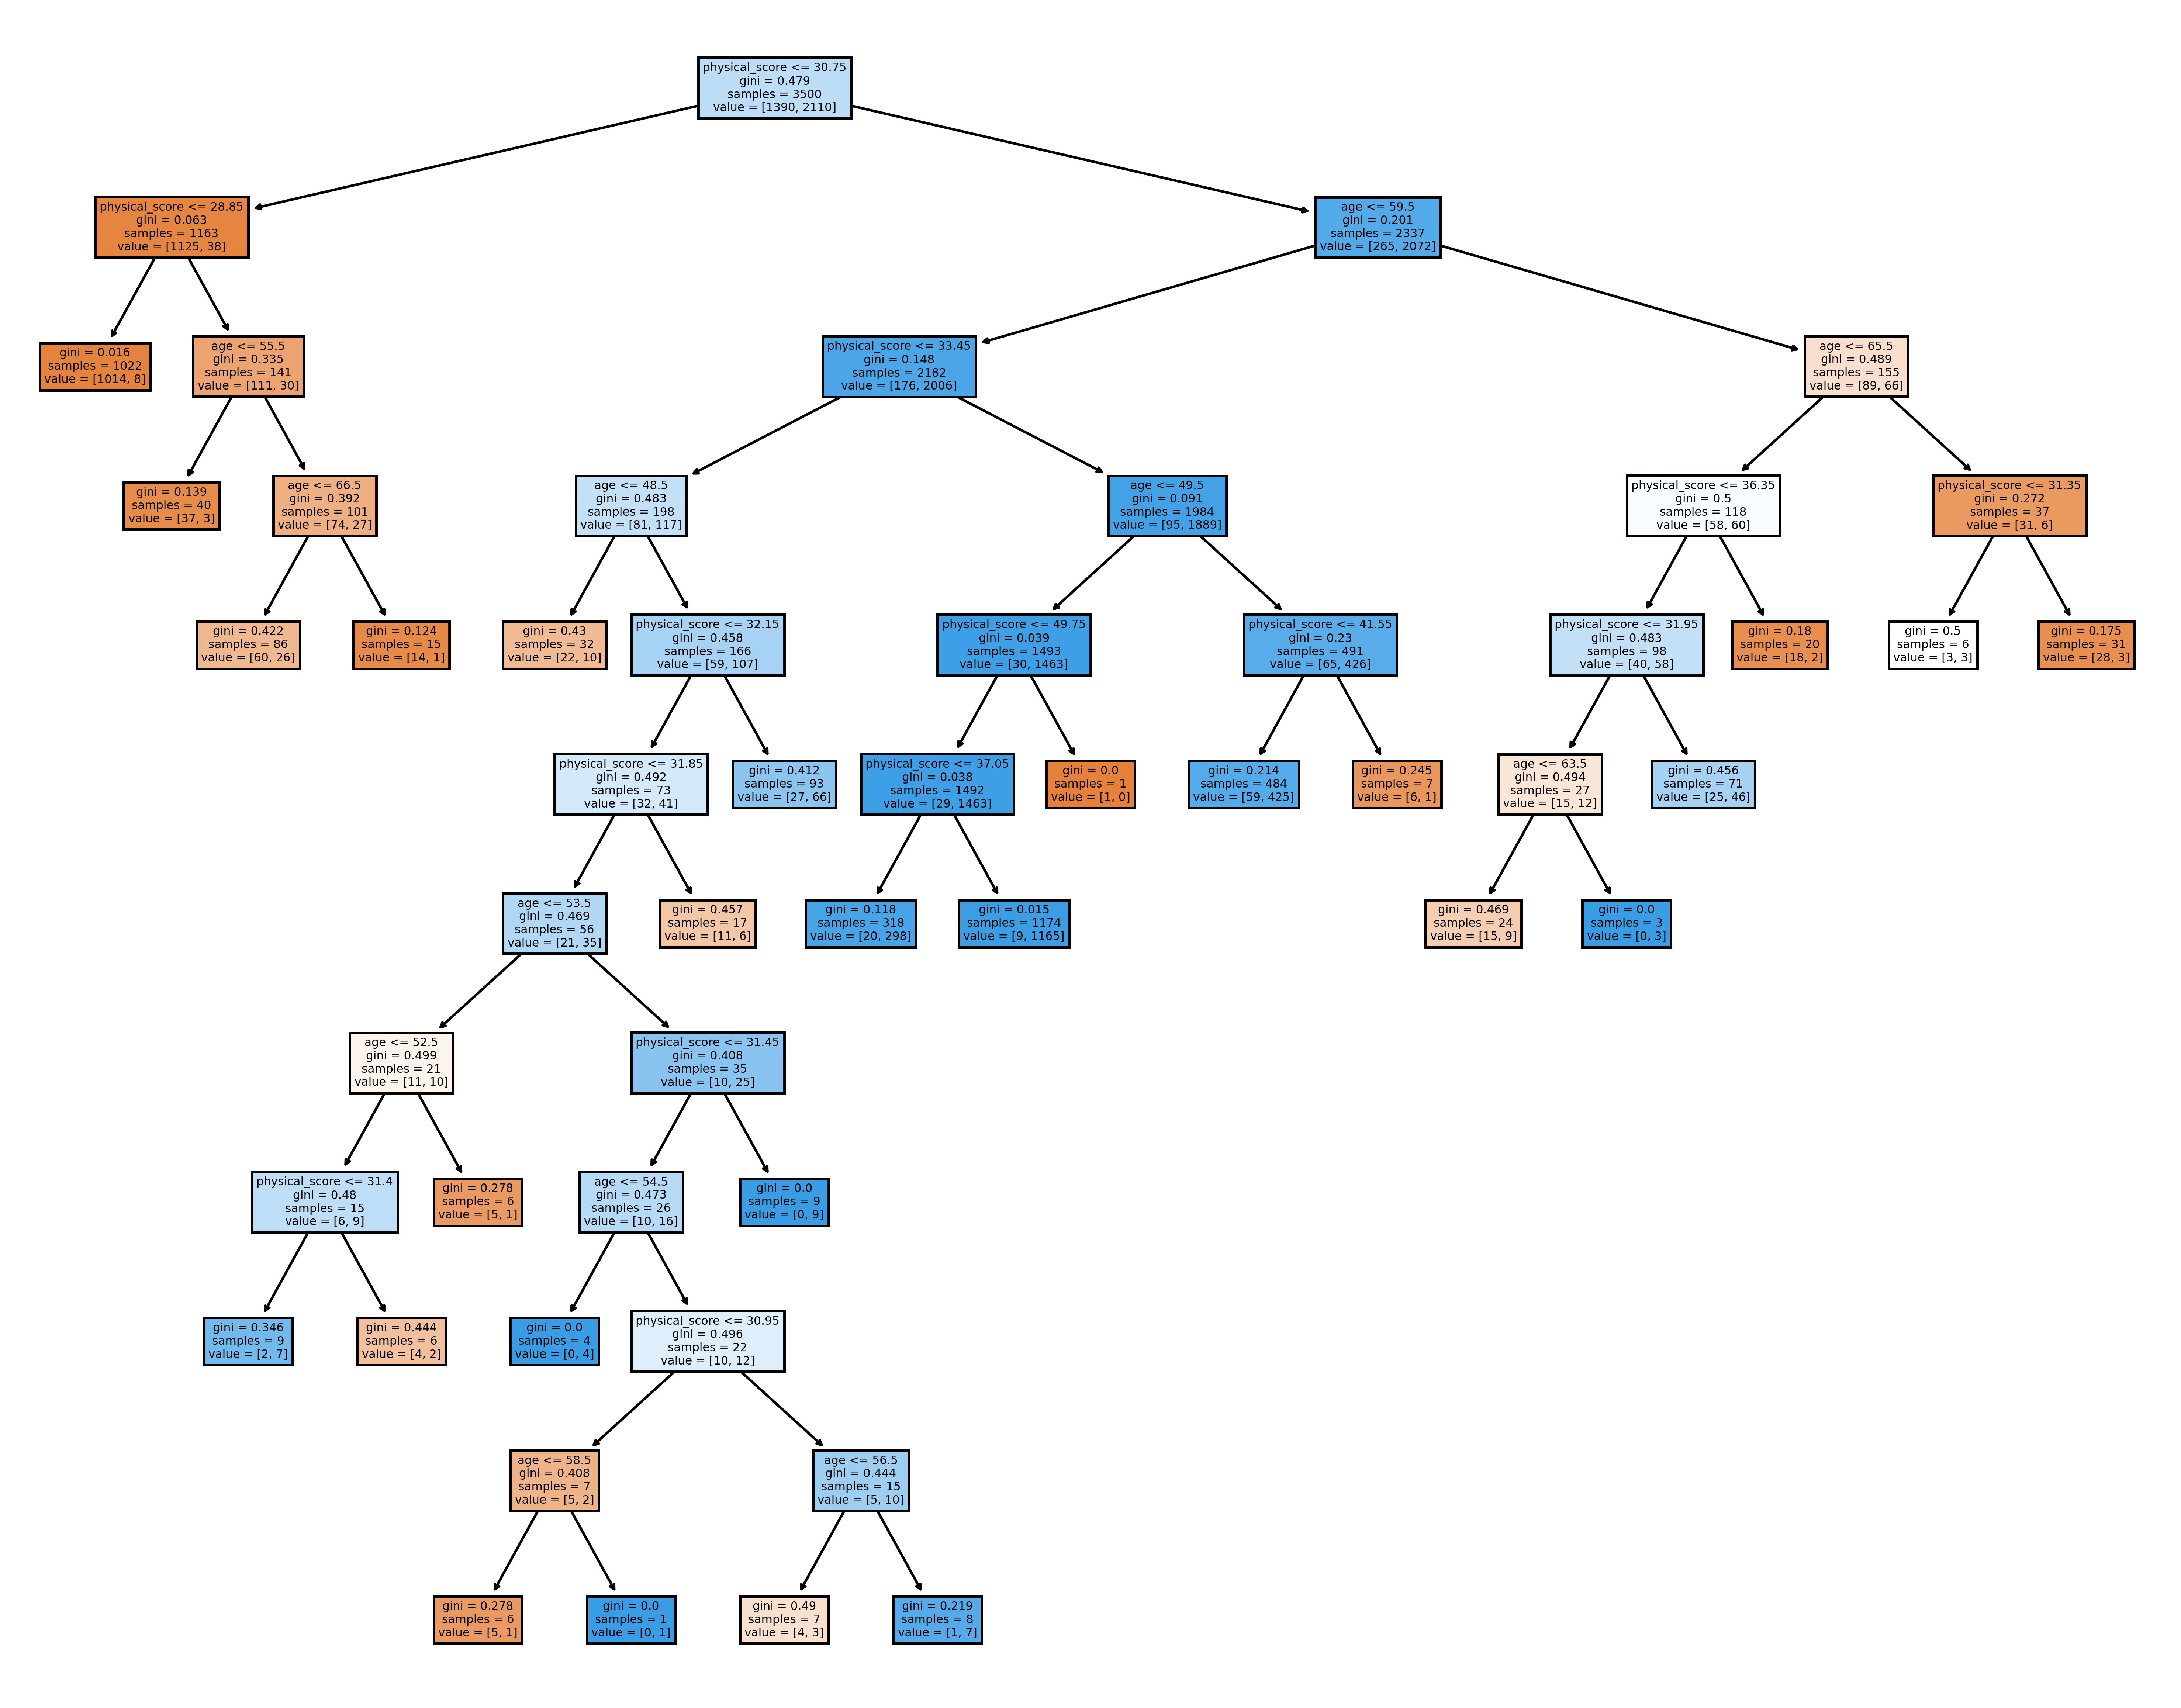

In [68]:
dtc=DecisionTreeClassifier(random_state=42,max_leaf_nodes=27,criterion='gini')
dtc.fit(X_train,y_train)

train_pred=dtc.predict(X_train)
test_pred= dtc.predict(X_test)
    
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))
    
plt.figure(figsize=(15,12),dpi=500)
plot_tree(dtc,filled=True,feature_names=X.columns)
   
score= cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_pred)

array([[537,  73],
       [ 34, 856]], dtype=int64)

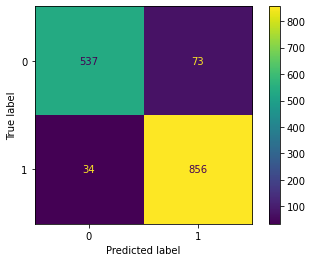

In [70]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc,X_test,y_test)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       610
           1       0.92      0.96      0.94       890

    accuracy                           0.93      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500



# random forest technique

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

score.mean()

train accuracy: 0.908
test accuracy: 0.9751428571428571
[0.903 0.904 0.901 0.89  0.896]


0.8988000000000002

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[531,  79],
       [ 59, 831]], dtype=int64)

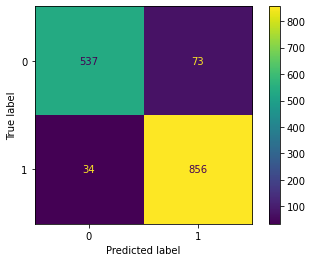

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc,X_test,y_test)


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       610
           1       0.91      0.93      0.92       890

    accuracy                           0.91      1500
   macro avg       0.91      0.90      0.90      1500
weighted avg       0.91      0.91      0.91      1500



# hypertuning

In [76]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=42)

param_grid= {'max_leaf_nodes' : list(range(1,20))}

Hp_rfc= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_rfc.fit(X_train,y_train)

Hp_rfc.best_params_

{'max_leaf_nodes': 12}

# rebuilt the model

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42,max_leaf_nodes=12)
rfc.fit(X_train,y_train)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

score.mean()

train accuracy: 0.9346666666666666
test accuracy: 0.9302857142857143
[0.937 0.923 0.917 0.932 0.926]


0.9269999999999999

# gradient boosting technique

train accuracy: 0.932
test accuracy: 0.9348571428571428
[0.937 0.923 0.917 0.932 0.926]
**********
cv_score : 0.9269999999999999
**********
[[532  78]
 [ 24 866]]
**********
**********
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       610
           1       0.92      0.97      0.94       890

    accuracy                           0.93      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500



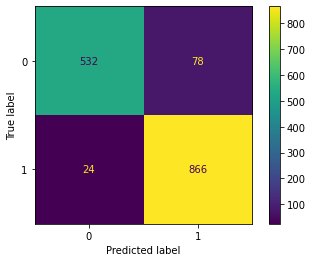

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

print('*'*10)
print('cv_score :',score.mean())

print('*'*10)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,test_prediction))

print('*'*10)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc,X_test,y_test)

print('*'*10)
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

# hypertuning 

In [79]:
estimator= GradientBoostingClassifier()

param_grid = {'n_estimators': list(range(1,100)),'learning_rate':[.1,.2,.3,.4,.5,.8,1]}

hp=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
hp.fit(X_train,y_train)
hp.best_params_

{'learning_rate': 0.4, 'n_estimators': 7}

**********
train accuracy: 0.9353333333333333
test accuracy: 0.9308571428571428
**********
[0.937 0.923 0.917 0.932 0.926]
**********
cv_score : 0.9269999999999999
**********
[[533  77]
 [ 20 870]]
**********
**********
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       610
           1       0.92      0.98      0.95       890

    accuracy                           0.94      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.94      0.94      0.93      1500



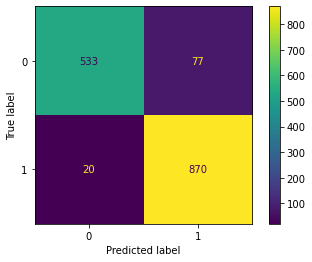

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(random_state=42,learning_rate=0.4,n_estimators= 7)
gbc.fit(X_train,y_train)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)

print('*'*10)
# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

print('*'*10)
# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

print('*'*10)
print('cv_score :',score.mean())

print('*'*10)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,test_prediction))

print('*'*10)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc,X_test,y_test)

print('*'*10)
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

In [81]:
gbc.feature_importances_

array([0.07454058, 0.92545942])